<a href="https://colab.research.google.com/github/sjarodstudent/FourierTransformPython/blob/master/traitement_du_signal_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# constants

SAMPLE_RATE = 44100 # number of points per second
# SAMPLE_RATE = 20

In [ ]:
import numpy as np

class Signal :
  f = 0

  t = np.array([]); # time values t
  y = np.array([]); # signal values y = s(t)

  def __init__(__self__, f) :
    __self__.f = f

  def plot(__self__, color = "r") :
    plt.plot(__self__.t, __self__.y, color)

  def getData(__self__) :
    return __self__.y.astype(np.int16)

In [ ]:
import math

# https://fr.wikipedia.org/wiki/Signal_sinuso%C3%AFdal

# t time value
# A signal amplitude
# omega pulsation (rad/s)
# phi phase (rad)
def sin_signal(t, A, omega, phi) :
  return A * math.sin(omega * t + phi)

In [ ]:
# f audio wave frequency
# phi phase (rad)
# duration (second)
def generate_single_sin_signal(f, phi = 0.0, d = 1.0, A = 0.0) :
  if A == 0.0 :
    A = np.iinfo(np.int16).max

  signal = Signal(f)

  t = 0.0
  step = 1.0 / SAMPLE_RATE
  while t < d :
    signal.t = np.append(signal.t, t)
    signal.y = np.append(signal.y, sin_signal(t, A, 2.0 * math.pi * f, phi))

    t += step

  return signal

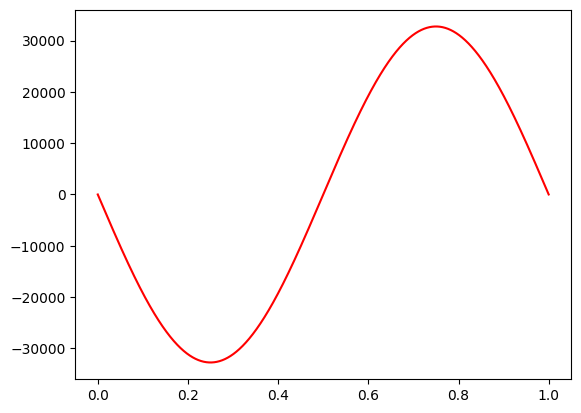

In [ ]:
import matplotlib.pyplot as plt

s = generate_single_sin_signal(1, math.pi)
s.plot()
plt.show()

In [ ]:
def signal_add(s1, s2) :
  newSignal = Signal(s1.f + s2.f)
  newSignal.t = s1.t
  newSignal.y = s1.y + s2.y
  return newSignal

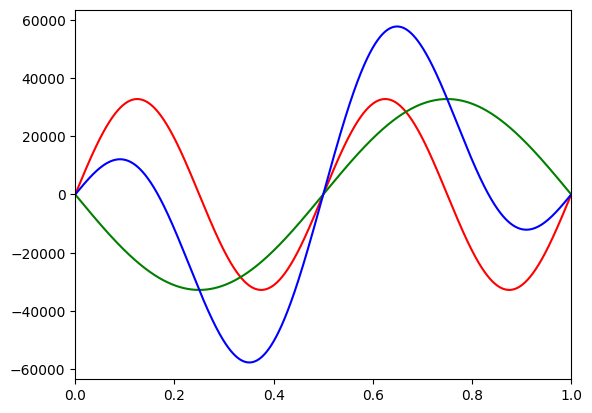

In [ ]:
s1 = generate_single_sin_signal(2)
s2 = generate_single_sin_signal(1, math.pi)
s3 = signal_add(s1, s2)

s1.plot("r")
s2.plot("g")
s3.plot("b")

plt.xlim(0, 1)
plt.show()

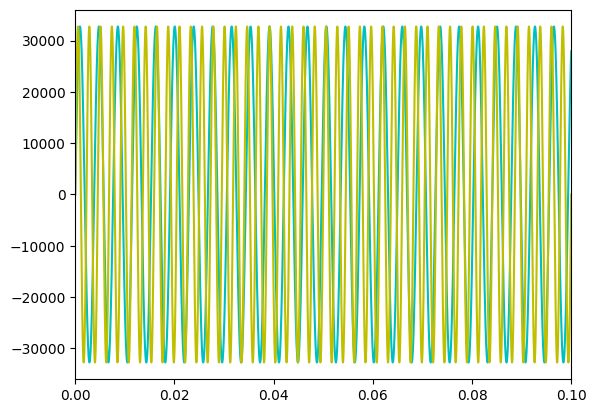

In [ ]:
d = 0.1

# do3
c4 = generate_single_sin_signal(261.626, 0, d)

# la3
a4 = generate_single_sin_signal(440, 0, d)

c4.plot("c")
a4.plot("y")
plt.xlim(0, d)
plt.show()

In [ ]:
# fs frequencies [[],[],[]]
# d duration (second)
def generate_sin_signal(fs, d = 1.0) :
  signal = generate_single_sin_signal(fs[0][0], fs[0][1], d)
  for i in range(1, len(fs)) :
    signal = signal_add(signal, generate_single_sin_signal(fs[i][0], fs[i][1], d))

  return signal

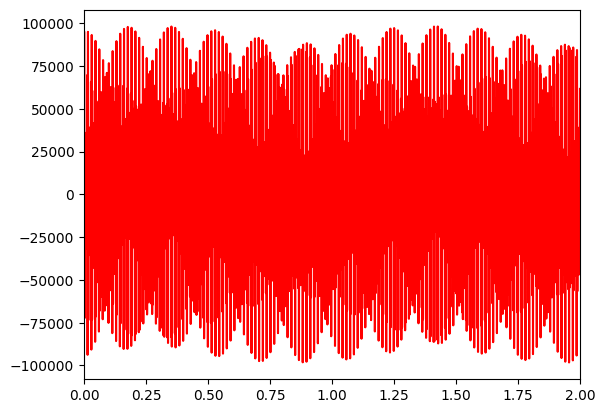

In [ ]:
d = 2

# mi3
e4 = generate_single_sin_signal(329.628, d)

# sol3
g4 = generate_single_sin_signal(391.995, d)

# do major
cmaj = generate_sin_signal([[c4.f, 0], [e4.f, 0], [g4.f, 0]], d)

cmaj.plot()
plt.xlim(0, d)
plt.show()

In [ ]:
# signal duration
dolad = 2

# 100hz frequency signal
dola = generate_sin_signal([[262, 0], [440, 0]], dolad)

dola4000 = generate_sin_signal([[262, 0], [440, 0], [4000, 0]], dolad)

In [ ]:
# f audio wave frequency
# phi phase (rad)
# duration (second)
def generate_white_noise(A = 0.0) :
  if A == 0.0 :
    A = np.iinfo(np.int16).max

  signal = Signal(0)

  t = 0.0
  step = 1.0 / SAMPLE_RATE
  while t < d :
    signal.t = np.append(signal.t, t)
    signal.y = np.append(signal.y, np.random.normal() * A)

    t += step

  return signal

In [ ]:
dolarand = signal_add(dola, generate_white_noise())

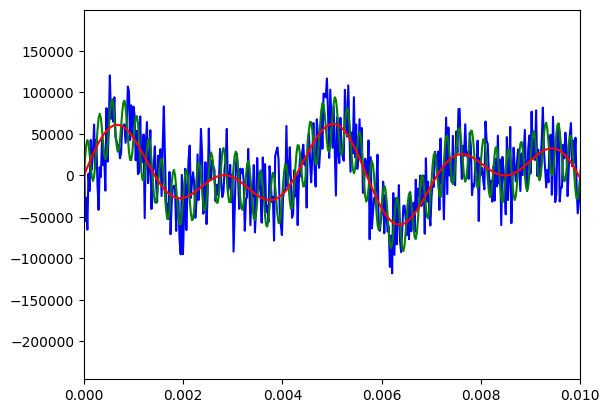

In [ ]:
dolarand.plot("b")
dola4000.plot("g")
dola.plot("r")

plt.xlim(0, 0.01)
plt.show();

les deux bruits suivent a peu pres le signal de base mais le bruit blanc (bleu) possede des variations aleatoires le long du signal alors que le bruit sinusoidale (vert) a une variation sinusoidale

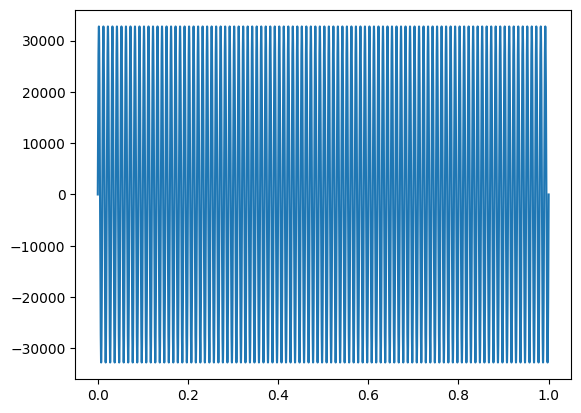

In [ ]:
from scipy.io import wavfile

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html

samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
wavfile.write("example.wav", samplerate, data.astype(np.int16))

plt.plot(t, data)
plt.show()

In [ ]:
wavfile.write("cmaj.wav", SAMPLE_RATE, cmaj.getData())

In [ ]:
wavfile.write("dola4000.wav", SAMPLE_RATE, dola4000.getData())
wavfile.write("dolarand.wav", SAMPLE_RATE, dolarand.getData())

le bruit blanc efface quasiment le son de base

le bruit sinusoidal a tres haute frequence est strident mais on reconnait le son de base

88200 88200 88200


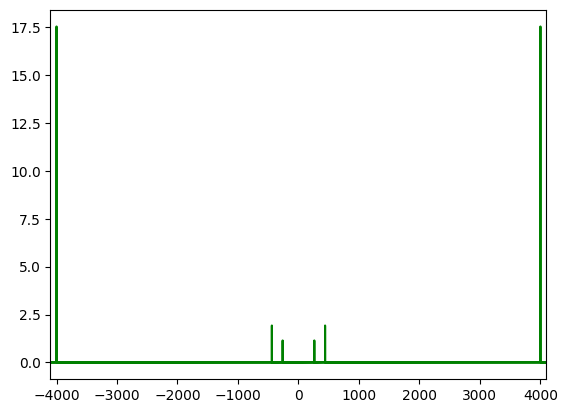

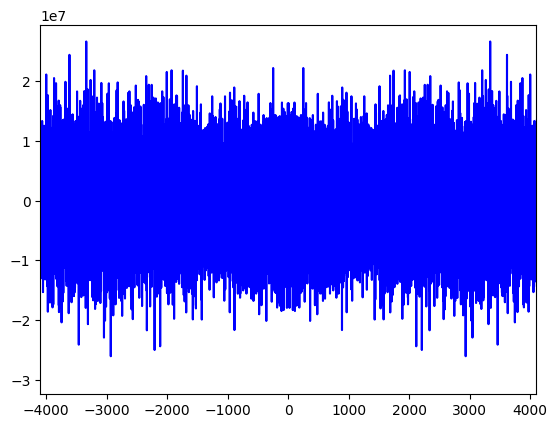

In [ ]:
from scipy.fft import fft, ifft, fftfreq

# fourier transform of the signal with 4000 hz noise
dola4000fft = fft(dola4000.y)

# fourier transform of the signal with white noise
dolarandfft = fft(dolarand.y)

# sampling
sfreq = fftfreq(dolad * SAMPLE_RATE, 1 / SAMPLE_RATE)

# TODO : when SAMPLE_RATE = 5 or 15 : crash
print(len(sfreq), len(dola4000fft), len(dola4000.y))

plt.plot(sfreq, dola4000fft, "g")
plt.xlim([-4100, 4100])
plt.show()
plt.plot(sfreq, dolarandfft, "b")
plt.xlim([-4100, 4100])
plt.show()

le bruit blanc possède toutes les fréquences

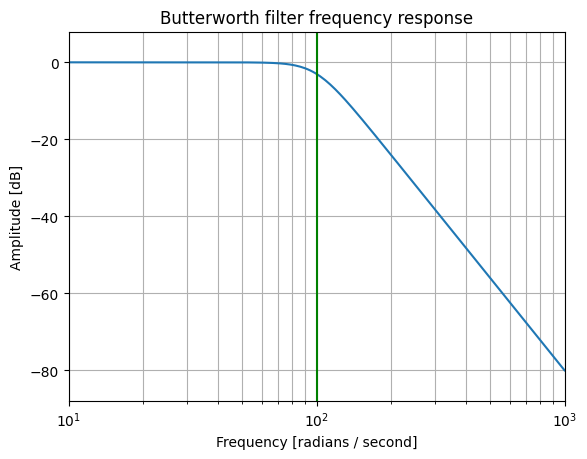

In [ ]:
from scipy import signal

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))

plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

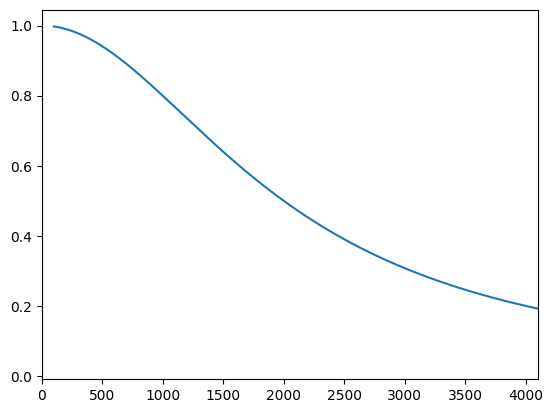

In [ ]:
# 1st order low pass filter at 2000hz

b, a = signal.butter(1, 2000, 'low', analog=True)
w, h = signal.freqs(b, a)

plt.plot(w, h)
plt.xlim([0, 4100])
plt.show()

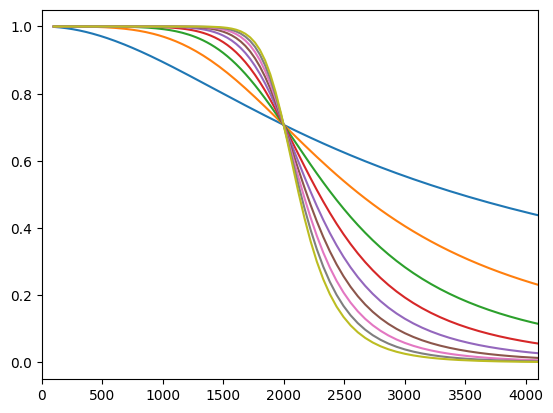

In [ ]:
# low pass filters at 2000hz
for i in range(1, 10) :
  b, a = signal.butter(i, 2000, 'low', analog=True)
  w, h = signal.freqs(b, a)

  plt.plot(w, abs(h))
  plt.xlim([0, 4100])
plt.show()

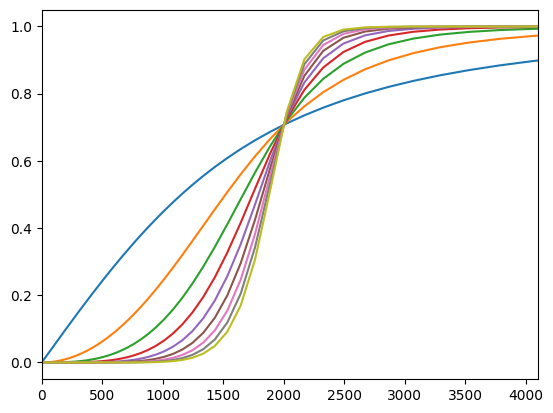

In [ ]:
# high pass filters at 2000hz
for i in range(1, 10) :
  b, a = signal.butter(i, 2000, 'high', analog=True)
  w, h = signal.freqs(b, a)

  plt.plot(w, abs(h))
  plt.xlim([0, 4100])
plt.show()

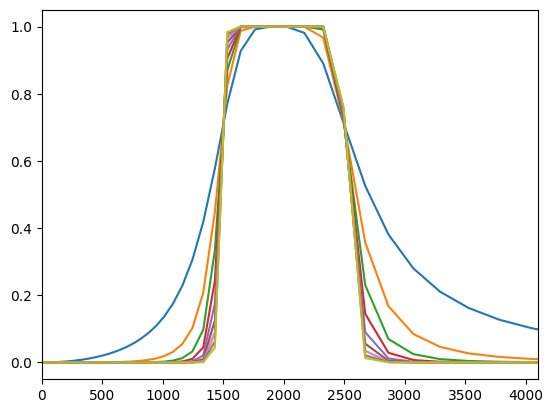

In [ ]:
# band pass filters arround 2000hz
for i in range(1, 10) :
  b, a = signal.butter(2 * i, [1500, 2500], 'band', analog=True)
  w, h = signal.freqs(b, a)

  plt.plot(w, abs(h))
  plt.xlim([0, 4100])
plt.show()

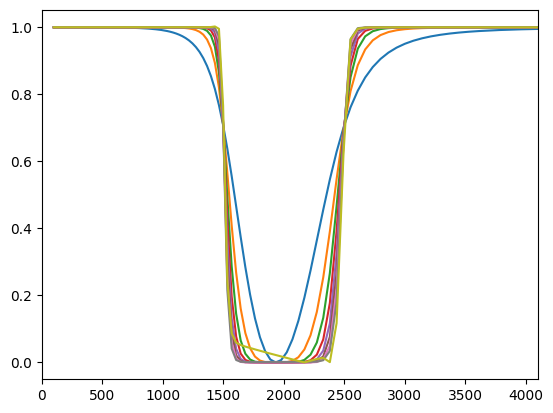

In [ ]:
# bandstop filters arround 2000hz
for i in range(1, 10) :
  b, a = signal.butter(2 * i, [1500, 2500], 'bandstop', analog=True)
  w, h = signal.freqs(b, a)

  plt.plot(w, abs(h))
  plt.xlim([0, 4100])
plt.show()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqs.html

butter args :
- n : order number
- wn : frequency/frequencies
- btype : filter type

freqs args :
- b : output of butter
- a : output of butter

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

t = np.linspace(0, 1.0, 2001)
xlow = np.sin(2 * np.pi * 5 * t)
xhigh = np.sin(2 * np.pi * 250 * t)
x = xlow + xhigh

b, a = signal.butter(8, 0.125)
y = signal.filtfilt(b, a, x, padlen=150)
np.abs(y - xlow).max()

9.108629580020788e-06

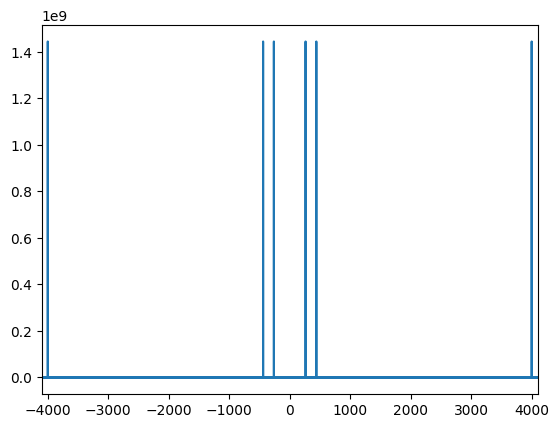

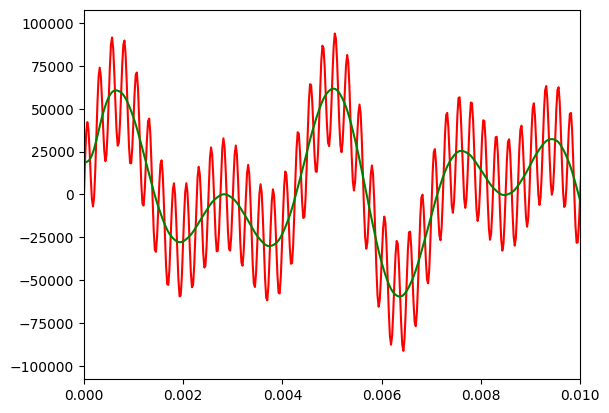

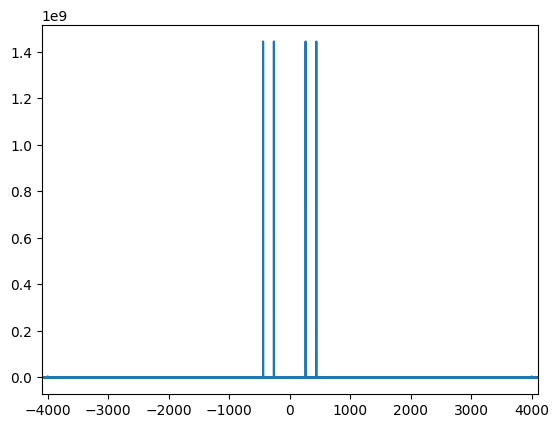

In [ ]:
# base do la signal fft
plt.plot(sfreq, abs(dola4000fft))
plt.xlim([-4100, 4100])
plt.show()





# low pass filter to remove the 4000hz noise
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# the wn should be normalized by multiplying with 2 / fs
# the signal are digital
b, a = signal.butter(4, 2000 * 2 / SAMPLE_RATE, 'low', analog=False)

# filtering
y2 = signal.filtfilt(b, a, dola4000.y, method="gust")





# base do la signal and filtered signal
dola4000.plot('r')
plt.plot(dola4000.t, y2, 'g')
plt.xlim([0, 0.01])
plt.show()

# filtered signal fft
dola4000fft2 = fft(y2)
plt.plot(sfreq, abs(dola4000fft2))
plt.xlim([-4100, 4100])
plt.show()

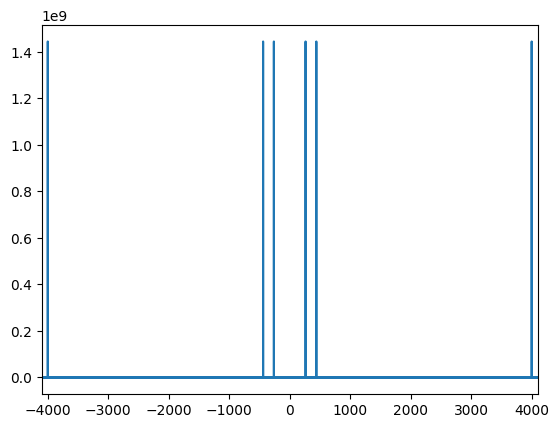

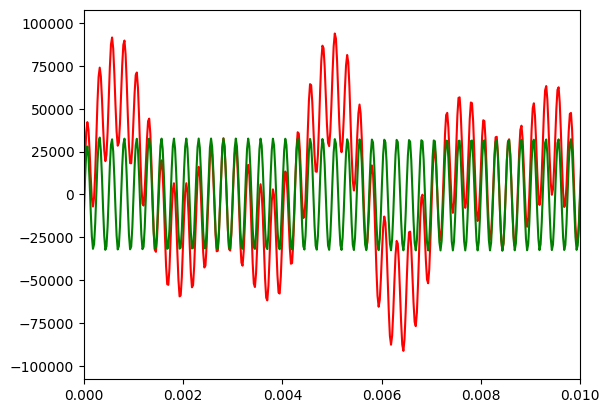

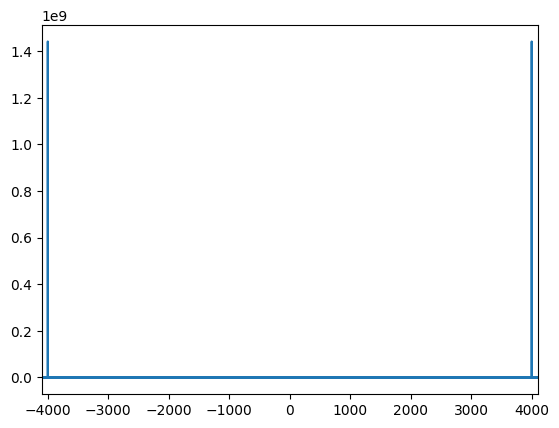

In [ ]:
# base do la signal fft
plt.plot(sfreq, abs(dola4000fft))
plt.xlim([-4100, 4100])
plt.show()





# high pass filter to show the 4000hz noise
b, a = signal.butter(4, 2000 * 2 / SAMPLE_RATE, 'high', analog=False)

# filtering
y2 = signal.filtfilt(b, a, dola4000.y, method="gust")





# base do la signal and filtered signal
dola4000.plot('r')
plt.plot(dola4000.t, y2, 'g')
plt.xlim([0, 0.01])
plt.show()

# filtered signal fft
dola4000fft2 = fft(y2)
plt.plot(sfreq, abs(dola4000fft2))
plt.xlim([-4100, 4100])
plt.show()

le son filtré suit bien les variations du signal de base
le bruit haute frequence semble constant